### Домашнее задание №6. Теория оптимизации

Проведите вычислительные эксперимент - для заданной функции Растригина найдите среднее и минимальное значение целевой функции по результатам 100 экспериментов, а также среднее число итераций при случайных начальных условиях в диапазон [-5;5]. Эксперимент выполнить для размерностей d = 2 и 4

In [19]:
import numpy as np
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

d = 2

In [20]:
def rastrigin_2(x):
    return 10*2 + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0)

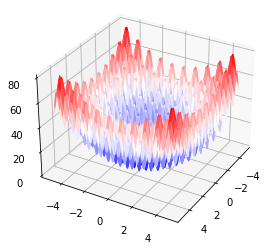

In [21]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.01)
Y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(X, Y)
Z = rastrigin_2(np.array([X,Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='bwr')

ax.azim = 30
ax.dist = 9
ax.elev = 30

plt.show()

In [55]:
it_list_2=[]
res_list_2=[]

for i in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(2,))
    res = minimize(rastrigin_2, x0, method = 'nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    
    it_list_2.append(res.nit) # количество итераций
    res_list_2.append(rastrigin_2(res.x)) # оптимальная точка минимума функции

In [56]:
np.mean(it_list_2) #среднее число итераций

62.26

In [57]:
np.mean(res_list_2) #среднее значение целевой функции

17.55095994913177

In [58]:
np.min(res_list_2) #минимальное значение целевой функции

0.0

d = 4

In [59]:
def rastrigin_4(x):
    return 10*4 + np.sum(x**2 - 10*np.cos(2*np.pi*x), axis=0)

In [60]:
it_list_4=[]
res_list_4=[]

for i in range(100):
    x0 = np.random.uniform(low=-5, high=5, size=(4,))
    res = minimize(rastrigin_4, x0, method = 'nelder-mead', options = {'xtol': 1e-8, 'disp': False})
    
    it_list_4.append(res.nit) # количество итераций
    res_list_4.append(rastrigin_4(res.x)) # оптимальная точка минимума функции

In [61]:
np.mean(it_list_4) #среднее число итераций

181.32

In [62]:
np.mean(res_list_4) #среднее значение целевой функции

35.708846840821764

In [63]:
np.min(res_list_4) #минимальное значение целевой функции

4.974790247647377

In [140]:
# создание таблицы

In [64]:
import pandas as pd

In [65]:
df = pd.DataFrame({'Показатели':['Среднее значение целевой функции','Минимальное значение целевой функции',
                                 'Среднее число итераций'],
                   'd=2':[np.mean(res_list_2), np.min(res_list_2), np.mean(it_list_2)],
                   'd=4':[np.mean(res_list_4), np.min(res_list_4), np.mean(it_list_4)],
                  })
df

,Показатели,d=2,d=4
0,Среднее значение целевой функции,17.55096,35.708847
1,Минимальное значение целевой функции,0.00000,4.974790
2,Среднее число итераций,62.26000,181.320000


Метод Нелдера-Мида выдает приемлемые результаты при невысоких размерностях. На тестовой функции Растригина в размерности d=2 минимальное значение получилось равным нулю при 100 итерациях. При d=4 как среднее, так и минимальное значения далеки от ожидаемого нуля